### Mhariadora Bocalbos ####
### Kunming Song ####

# Research Question

The dataset that we will be working on contains is a historical data of real estate valuation from Sindian District, New Taipei, Taiwan. This data set will be used to build a model that will predict the house price per unit area (1000 New Taiwan Dollar/Ping, where Ping is a local unit and 1 Ping = 3.3 meter squared) using variables such as house age, distance to the nearest MRT station, and number of convenience stores in the living circles on foot.

Our null hypothesis is:
There will be no significant prediction of house price per unit area by house age, distance to nearest MRT station, and number of convenience stores in the living circles on foot.

Our alternative hypothesis is:
There is a significant prediction of house price per unit area by house age, distance to nearest MRT station, and number of convenience stores in the living circles on foot.

# Inspection of the data

Where does it come from? Our dataset comes from UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

What does each variable mean?

Dependent/Response Variable: Y = house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

Independent/Explanatory Variables: 
House age (unit: year) <br>
Distance to the nearest MRT station (unit: meter) <br>
Number of convenient stores in the living circle on foot (integer)

In [2]:
import numpy as np
import pandas as pd

real_estate = pd.read_csv('https://raw.githubusercontent.com/doryaswi/DAV-5400/master/Real%20estate%20valuation%20data%20set.csv')
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Line by Line




In [3]:
real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [4]:
re_df = real_estate[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'Y house price of unit area']]
re_df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
5,7.1,2175.03000,3,32.1
6,34.5,623.47310,7,40.3
7,20.3,287.60250,6,46.7
8,31.7,5512.03800,1,18.8
9,17.9,1783.18000,3,22.1


In [5]:
re_df.rename(columns={'X2 house age':'age', 
                      'X3 distance to the nearest MRT station':'MRT', 
                      'X4 number of convenience stores':'stores', 
                      'Y house price of unit area':'price'}, inplace=True)
re_df.head()

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,age,MRT,stores,price
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [6]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
age       414 non-null float64
MRT       414 non-null float64
stores    414 non-null int64
price     414 non-null float64
dtypes: float64(3), int64(1)
memory usage: 13.0 KB


## Summary Statistics

They appear to be centered slightly above 0 with a sample standard deviation of less than one. If they differed much, we would break out an analysis of each.

We could also discuss the quantiles.



In [7]:
re_df.describe()

,age,MRT,stores,price
count,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,37.980193
std,11.392485,1262.109595,2.945562,13.606488
min,0.000000,23.382840,0.000000,7.600000
25%,9.025000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.450000
75%,28.150000,1454.279000,6.000000,46.600000
max,43.800000,6488.021000,10.000000,117.500000


**Findings:**

*House Age:* The mean house age included in this data set is 17.71. The median house age is 16.1 which is close to the mean therefore, the distribution of house age is close to normal although it may be slightly skewed to the right.

*MRT:* The mean of the distance to the nearest MRT is 

# Visual Inspection of the data

Are there outliers? What is the shape of the data?

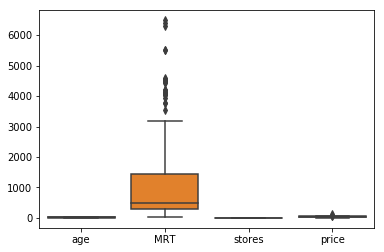

In [8]:
import seaborn as sns

sns.boxplot(data=re_df);

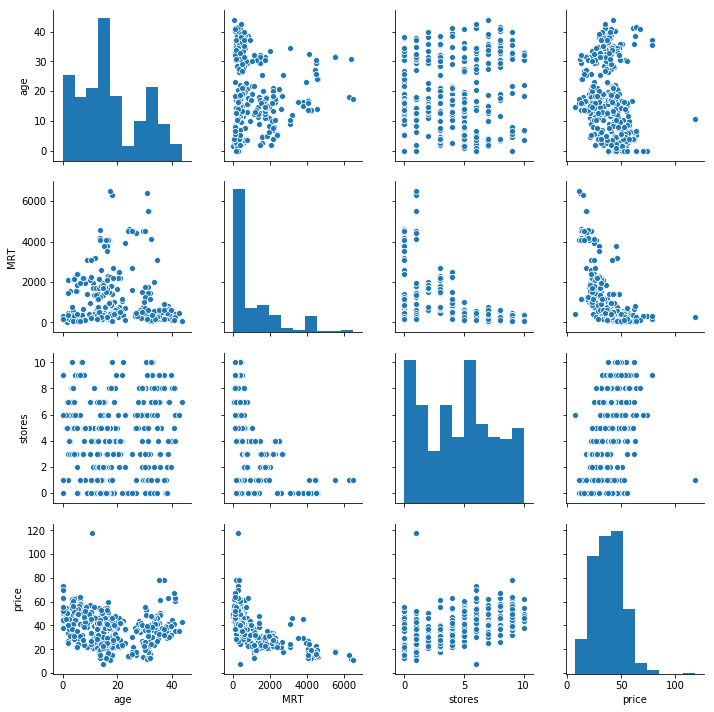

In [9]:
sns.pairplot(re_df)

In [10]:
re_df.corr()

,age,MRT,stores,price
age,1.000000,0.025622,0.049593,-0.210567
MRT,0.025622,1.000000,-0.602519,-0.673613
stores,0.049593,-0.602519,1.000000,0.571005
price,-0.210567,-0.673613,0.571005,1.000000


The above plots show us histograms of each dataset, and scatterplots of their relationships between each other.

Does the variable we want to predict (y) have a relationship with the first X variable? What about the other two pairs?

Are there outliers? Are the data distributed uniformly? Normally?

# Tables of Regression Results

What do these results mean? 

What relationships are there that we can infer exist here?

In [14]:
import statsmodels.api as sm
model = sm.OLS(re_df['price'], sm.add_constant(re_df['age']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     19.11
Date:                Mon, 06 May 2019   Prob (F-statistic):           1.56e-05
Time:                        15:29:25   Log-Likelihood:                -1658.3
No. Observations:                 414   AIC:                             3321.
Df Residuals:                     412   BIC:                             3329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.4347      1.211     35.042      0.0

We could also consider x2. Is there any relationship here?

In [16]:
model = sm.OLS(re_df['price'], sm.add_constant(re_df['MRT']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Mon, 06 May 2019   Prob (F-statistic):           4.64e-56
Time:                        15:29:48   Log-Likelihood:                -1542.5
No. Observations:                 414   AIC:                             3089.
Df Residuals:                     412   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8514      0.653     70.258      0.0

In [17]:
model = sm.OLS(re_df['price'], sm.add_constant(re_df['stores']))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 06 May 2019   Prob (F-statistic):           3.41e-37
Time:                        15:42:47   Log-Likelihood:                -1586.0
No. Observations:                 414   AIC:                             3176.
Df Residuals:                     412   BIC:                             3184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1811      0.942     28.857      0.0

In [18]:
import statsmodels.formula.api as smf
model = smf.ols(formula="price ~ MRT + stores",data=re_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     202.7
Date:                Mon, 06 May 2019   Prob (F-statistic):           5.61e-62
Time:                        15:44:16   Log-Likelihood:                -1525.6
No. Observations:                 414   AIC:                             3057.
Df Residuals:                     411   BIC:                             3069.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1229      1.300     30.106      0.0

In [19]:
import statsmodels.formula.api as smf
model = smf.ols(formula="price ~ age + MRT + stores",data=re_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     161.1
Date:                Mon, 06 May 2019   Prob (F-statistic):           5.44e-69
Time:                        15:44:47   Log-Likelihood:                -1506.5
No. Observations:                 414   AIC:                             3021.
Df Residuals:                     410   BIC:                             3037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9773      1.385     31.041      0.0

# Analysis, Qualitative and Quantitative

Does there seem to be a relationship between the data you have examined?

Bonus: should we infer anything from the other diagnostics shown here that we did not cover in class? (This requires your own research on what they mean.)




# Final Conclusions

Do we reject, or fail to reject, the null hypothesis?

Why? What is the likelihood we saw this kind of relationship do to random chance?

What nuance can we provide here?

# Appendix

An appendix is unnecessary, but this is where you might add any ancilary information.

In this case, I'm showing how we got the seed for numpy's pseudo-random number generator.